- Do a basic implementation of JPEG:

1. Divide the image into non-overlapping 8x8 blocks.

2. Compute the DCT (discrete cosine transform) of each block. This is implemented in popular packages such as Matlab.

3. Quantize each block. You can do this using the tables in the video or simply divide each coefficient by N, round the result to the nearest integer, and multiply back by N. Try for different values of N.

4. You can also try preserving the 8 largest coefficients (out of the total of 8x8=64), and simply rounding them to the closest integer.

5. Visualize the results after inverting the quantization and the DCT.

- Repeat the above but instead of using the DCT, use the FFT (Fast Fourier Transform).

- Repeat the above JPEG-type compression but don’t use any transform, simply perform quantization on the original image.

- Do JPEG now for color images. In Matlab, use the rgb2ycbcr command to convert the Red-Green-Blue image to a Lumina and Chroma one; then perform the JPEG-style compression on each one of the three channels independently. After inverting the compression, invert the color transform and visualize the result. While keeping the compression ratio constant for the Y channel, increase the compression of the two chrominance channels and observe the results.

- Compute the histogram of a given image and of its prediction errors. If the

1. pixel being processed is at coordinate (0,0), consider

2. predicting based on just the pixel at (-1,0);

3. predicting based on just the pixel at (0,1);

4. predicting based on the average of the pixels at (-1,0), (-1,1), and (0,1).

- Compute the entropy for each one of the predictors in the previous exercise. Which predictor will compress better?

In [1]:
import cv2
import numpy as np
from PIL import Image
from pathlib import Path
import cv2

In [2]:
img_path = Path(r"C:\IT\Image and Video Processing From Mars to Hollywood with a Stop at the Hospital\notebooks\images\lena.png")
img_gray_path = Path(r"C:\IT\Image and Video Processing From Mars to Hollywood with a Stop at the Hospital\notebooks\images\lena_gray.png")
piwo_path = Path(r"C:\IT\Image and Video Processing From Mars to Hollywood with a Stop at the Hospital\notebooks\images\piwo.jpg")
#with open(img_path, 'r') as f:
img = Image.open(img_path)

In [3]:
np.array(Image.open(piwo_path)).shape

(976, 1480, 3)

In [4]:
img_arr = np.array(img)

TODO I should convert to YCbCr if I want to do like in original jpg

In [5]:
img_arr.shape
# H,  W,   c

(512, 512, 3)

In [6]:
# 1
# dont know a better way than iterating over the indexes. Need to think about it
# found - use numpy apply_along_axis or apply_over_axis???
def split_image_on_blocks(image, block_size=8):
    blocks = np.zeros((image.shape[0]//block_size, image.shape[1]//block_size, image.shape[2], block_size, block_size))
    for i in range(0, image.shape[0], block_size):
        for j in range(0, image.shape[1], block_size):
            for c in range(0, image.shape[2]):
                blocks[i//block_size, j//block_size, c, :] = image[i:i+block_size, j:j+block_size, c]
    return blocks

In [7]:
# TODO understand how this functions works!!!
#blocks_v2 = np.apply_over_axes(cv2.dct, img_arr, (0, 1, 2))

In [8]:
blocks = split_image_on_blocks(img_arr)
blocks.shape

(64, 64, 3, 8, 8)

In [9]:
# show sample block
blocks[8, 36, 1]

array([[84., 83., 84., 91., 87., 82., 85., 85.],
       [85., 83., 83., 99., 82., 85., 85., 84.],
       [83., 78., 85., 98., 81., 79., 81., 77.],
       [75., 81., 75., 82., 80., 81., 79., 76.],
       [74., 81., 75., 73., 67., 70., 75., 76.],
       [79., 74., 74., 72., 75., 73., 71., 72.],
       [69., 69., 65., 64., 71., 78., 72., 71.],
       [67., 62., 66., 67., 70., 69., 73., 70.]])

In [10]:
blocks.shape

(64, 64, 3, 8, 8)

In [11]:
blocks[0,0,0]

array([[226., 226., 223., 223., 226., 226., 228., 227.],
       [226., 226., 223., 223., 226., 226., 228., 227.],
       [226., 226., 223., 223., 226., 226., 228., 227.],
       [226., 226., 223., 223., 226., 226., 228., 227.],
       [226., 226., 223., 223., 226., 226., 228., 227.],
       [227., 227., 227., 222., 226., 228., 226., 230.],
       [228., 228., 225., 224., 225., 229., 229., 229.],
       [223., 223., 226., 221., 227., 225., 226., 228.]])

In [12]:
cv2.dct(cv2.dct(blocks[0,0,0])).astype(int)

array([[225, 313, 293, 262, 227, 179, 124,  62],
       [313, 434, 407, 364, 314, 248, 172,  87],
       [295, 409, 383, 343, 296, 234, 162,  82],
       [265, 368, 345, 308, 266, 210, 146,  74],
       [226, 313, 294, 262, 226, 179, 124,  63],
       [178, 246, 234, 206, 177, 143,  96,  52],
       [122, 170, 160, 143, 122,  98,  68,  34],
       [ 60,  81,  81,  71,  63,  47,  33,  18]])

In [13]:
cv2.dct(cv2.dct(blocks[0,0,0]), cv2.DCT_INVERSE).astype(int)

array([[225, 313, 293, 262, 227, 179, 124,  62],
       [313, 434, 407, 364, 314, 248, 172,  87],
       [295, 409, 383, 343, 296, 234, 162,  82],
       [265, 368, 345, 308, 266, 210, 146,  74],
       [226, 313, 294, 262, 226, 179, 124,  63],
       [178, 246, 234, 206, 177, 143,  96,  52],
       [122, 170, 160, 143, 122,  98,  68,  34],
       [ 60,  81,  81,  71,  63,  47,  33,  18]])

In [14]:
#2 
# There is also function dct this in scilab
def calculate_dct_for_blocks(blocks, inversed=False):
    # center around 0 ???
#     if not inversed:
#         blocks_shifted = blocks-128
#     else:
#         blocks_shifted = blocks
    blocks_shifted = blocks
    flag = cv2.DCT_INVERSE if inversed else 0
    dct_blocks = np.zeros(blocks.shape)
    for i in range(0, blocks.shape[0]):
        for j in range(0, blocks.shape[1]):
            for c in range(0, blocks.shape[2]):
                dct_blocks[i, j, c, :] = cv2.dct(blocks_shifted[i, j, c, :], flag)
    # makes sense to event the subtraction from previous excercise
#     if inversed:
#         dct_blocks += 128
    return dct_blocks

In [15]:
dct_blocks = calculate_dct_for_blocks(blocks)

In [16]:
dct_blocks[0, 0, 0, :].shape

(8, 8)

In [17]:
# show sample block
dct_blocks[8, 36, 1]

array([[ 6.17750000e+02, -4.46978358e-01, -4.68505576e+00,
        -4.27395421e-01,  3.75000000e+00,  6.73047179e+00,
        -3.47134737e+00, -6.03682805e+00],
       [ 5.08018592e+01,  6.00797837e+00, -9.14450869e+00,
        -8.17918127e+00,  6.19908026e+00,  7.64800807e+00,
        -3.94801871e+00, -6.62796563e+00],
       [ 3.43055265e-01, -7.53027725e+00, -1.96599026e+00,
         2.90903785e+00,  3.91288978e+00,  2.28076681e+00,
         1.91789322e+00,  2.86512708e+00],
       [-4.58442615e-01,  3.22288729e+00,  7.71789928e+00,
         1.03006764e+00, -1.98984543e+00, -6.78805335e+00,
         1.00390326e+00,  2.58983462e+00],
       [-6.50000000e+00, -3.22225975e+00,  3.71873177e+00,
        -2.35980639e+00, -3.00000000e+00, -3.86386775e+00,
        -3.43453549e+00,  2.82734539e+00],
       [-4.95727857e-01, -3.56991218e+00, -3.06733788e+00,
         6.39177168e+00, -1.58308290e+00, -4.80303841e+00,
         6.92923349e-01,  1.32123687e+00],
       [ 1.48149016e+00,  5.239968

In [18]:
#3 Quantization
# TODO should cast to int???
# TODO I should center values around 0, subtract 128
def quantize(blocks, coefficient):
    #return ((blocks/coefficient) * coefficient).astype(int)
    return (((blocks)//coefficient) * coefficient).astype(int)


In [19]:
dct_quantized_1_blocks = quantize(dct_blocks, 1)
dct_quantized_2_blocks = quantize(dct_blocks, 2)
dct_quantized_4_blocks = quantize(dct_blocks, 4)
dct_quantized_8_blocks = quantize(dct_blocks, 8)
dct_quantized_32_blocks = quantize(dct_blocks, 32)

In [20]:
(dct_blocks - dct_quantized_2_blocks).max()

2.0

In [21]:
#4
def preserve_n_largest_coefs(blocks, n_largest):
    filered_blocks = np.zeros(blocks.shape)
    for i in range(blocks.shape[0]):
        for j in range(blocks.shape[1]):
            for c in range(blocks.shape[2]):
                current_array = blocks[i, j, c, :]
                flatten_arr = current_array.flatten()
                sorted_indices = np.argsort(flatten_arr)
                n_lagest_coef = flatten_arr[-n_largest]                
                filered_blocks[i, j, c, :] = np.where(current_array>n_lagest_coef, np.round(current_array), 0)
    return filered_blocks

In [22]:
largest_in_blocks_8 = preserve_n_largest_coefs(dct_blocks, 8)
largest_in_blocks_16 = preserve_n_largest_coefs(dct_blocks, 16)

In [23]:
largest_in_blocks_8.max(), largest_in_blocks_16.max()

(2022.0, 2022.0)

In [24]:
# TODO why do I have negative values?
largest_in_blocks_8.min(), largest_in_blocks_16.min()

(-36.0, -37.0)

In [25]:
np.round(dct_blocks[8, 36, 1])

array([[618.,  -0.,  -5.,  -0.,   4.,   7.,  -3.,  -6.],
       [ 51.,   6.,  -9.,  -8.,   6.,   8.,  -4.,  -7.],
       [  0.,  -8.,  -2.,   3.,   4.,   2.,   2.,   3.],
       [ -0.,   3.,   8.,   1.,  -2.,  -7.,   1.,   3.],
       [ -7.,  -3.,   4.,  -2.,  -3.,  -4.,  -3.,   3.],
       [ -0.,  -4.,  -3.,   6.,  -2.,  -5.,   1.,   1.],
       [  1.,   5.,  -3.,  -2.,   5.,   4.,   1.,   5.],
       [ -4.,   1.,   2.,  -4.,  -2.,   2.,   0.,  -0.]])

In [26]:
#5
reversed_dct1 = calculate_dct_for_blocks(dct_quantized_1_blocks.astype(float), inversed=True)
reversed_dct2 = calculate_dct_for_blocks(dct_quantized_2_blocks.astype(float), inversed=True)
reversed_dct4 = calculate_dct_for_blocks(dct_quantized_4_blocks.astype(float), inversed=True)
reversed_dct8 = calculate_dct_for_blocks(dct_quantized_8_blocks.astype(float), inversed=True)
reversed_dct32 = calculate_dct_for_blocks(dct_quantized_32_blocks.astype(float), inversed=True)

In [27]:
reversed_dct2[0, 0, 0]

array([[218.25      , 313.9907491 , 293.60359907, 262.72561221,
        227.25      , 179.65388145, 125.44142702,  63.05390591],
       [313.94869829, 434.67817142, 407.40025942, 363.70184992,
        314.56407599, 247.92905702, 171.94215382,  87.94729181],
       [295.80121252, 409.57370192, 383.00803551, 343.21476378,
        296.72509205, 234.46370941, 163.35422959,  82.83490692],
       [266.86819399, 368.37990586, 345.22779198, 309.50364344,
        266.99273659, 209.73230148, 146.59416696,  74.39435144],
       [226.75      , 313.4028113 , 293.87419712, 262.8635619 ,
        226.75      , 180.34740137, 124.78814554,  63.44675339],
       [178.51312434, 245.80370009, 233.84453446, 206.42900063,
        178.69951552, 143.14280317,  95.66140791,  51.68185433],
       [122.90755742, 170.47375259, 160.85422959, 142.56842342,
        122.52487399,  99.1501666 ,  67.99196449,  33.76158423],
       [ 59.73187022,  80.64399095,  81.0606185 ,  71.76899451,
         62.82558284,  47.5037983

In [28]:
reversed_dct4[0, 0, 0]

array([[210.        , 313.78193883, 292.3530788 , 262.03879583,
        226.        , 180.04539551, 125.68881143,  62.29141114],
       [314.43775751, 434.79733749, 406.82789363, 362.96404516,
        313.10559746, 247.70440174, 170.81175395,  87.51934539],
       [296.20710959, 410.35734182, 381.77059864, 343.24538915,
        296.20710959, 234.90493893, 164.13455967,  82.24389351],
       [267.35478938, 369.09711257, 344.23958152, 309.86649491,
        266.70389836, 208.20188508, 147.29220578,  73.36587086],
       [227.        , 315.16897867, 293.65964176, 263.21467143,
        227.        , 180.83109047, 126.23000753,  62.56731052],
       [177.33489476, 245.12507389, 234.5929005 , 204.83792405,
        178.30902201, 143.42639831,  94.02878119,  52.19195426],
       [121.9276352 , 171.45949922, 161.13455967, 141.87418186,
        121.9276352 ,  99.7021089 ,  69.22940136,  32.15451168],
       [ 58.5546612 ,  78.15538435,  83.24457574,  73.20075658,
         65.25188201,  46.4731004

In [29]:
def reconstruct_image_from_blocks(blocks, block_size):
    num_channels = blocks.shape[2]
    rows = [[] for _ in range(num_channels)]
    for i in range(blocks.shape[0]):
        row = [[] for _ in range(num_channels)]
        for j in range(blocks.shape[1]):
            for c in range(num_channels):
                row[c].append(blocks[i, j, c, :, :])
        for c in range(num_channels):
            rows[c].append(np.hstack(row[c]))
    reconstructed_blocks = np.zeros((blocks.shape[0]*blocks.shape[3], blocks.shape[1]*blocks.shape[4], num_channels))
    for c in range(num_channels):
        reconstructed_blocks[:, :, c] = np.vstack(rows[c])
    return reconstructed_blocks

In [30]:
reconstructed_quant2 = reconstruct_image_from_blocks(reversed_dct2, 8)

In [31]:
reconstructed_quant2.shape

(512, 512, 3)

In [32]:
reconstructed_quant2.max(), reconstructed_quant2.mean()

(484.3399373615846, 111.80494690552257)

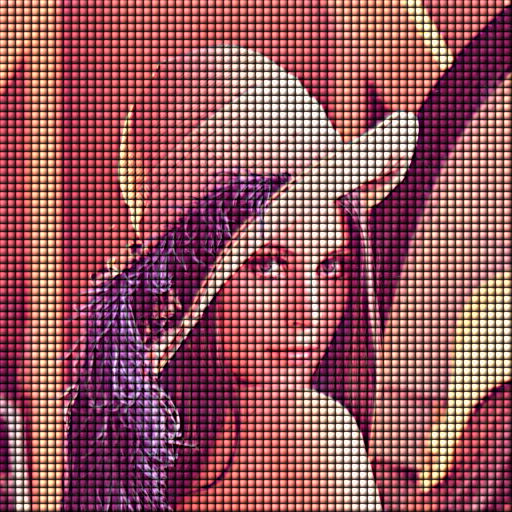

In [33]:
reconstructed_quant1 = reconstruct_image_from_blocks(reversed_dct1, 8)
Image.fromarray(reconstructed_quant1.clip(0, 255).astype("uint8"))

see 8th values of reconstructed images

In [34]:
reconstructed_quant1[0, ::8, 2]

array([121.375, 121.5  , 103.875, 107.   ,  98.875, 114.25 , 114.125,
        96.375,  80.   ,  86.   ,  84.375,  83.125,  88.   ,  80.375,
        80.25 ,  87.   ,  93.5  , 104.375,  99.375,  81.625,  87.25 ,
        88.   ,  98.125,  97.125,  94.   ,  99.875, 110.875, 101.75 ,
        97.125,  97.25 ,  97.125,  91.   ,  99.25 ,  93.125,  91.75 ,
        91.5  ,  91.   ,  90.25 ,  91.875,  91.5  ,  78.75 , 103.25 ,
       109.625,  97.875, 100.125, 115.25 , 105.125,  99.625,  93.125,
       109.75 , 121.75 , 151.125, 150.5  ,  88.75 ,  91.125,  92.625,
        89.   ,  89.375,  96.25 ,  86.75 ,  94.625,  89.625,  87.875,
        97.5  ])

In [35]:
reconstructed_quant1[0, 7::8, 2]

array([34.46784713, 28.09265632, 31.98186269, 27.03742554, 40.77383669,
       33.55582211, 35.78461648, 22.05257114, 15.50567151, 27.38747877,
       23.89060649, 25.70545481, 25.5389996 , 22.44527178, 20.32323627,
       26.04388538, 20.2333784 , 20.32939595, 27.24092887, 26.604161  ,
       31.09702302, 23.7329074 , 21.57056459, 24.36344727, 33.64473169,
       32.14082399, 28.90997712, 35.78029738, 21.28063159, 28.39869185,
       28.53398332, 34.82696942, 33.70029618, 25.99934914, 31.8806951 ,
       18.36281319, 27.43305993, 32.73203438, 24.77905052, 27.5336216 ,
       32.51624304, 36.6750521 , 35.19813626, 33.4270238 , 30.72999992,
       35.91128206, 28.75536535, 30.87705707, 29.50327845, 20.15980878,
       44.62968363, 41.25814967,  8.58394913, 23.77331637, 28.21416924,
       25.07935065, 16.57320208, 23.46262657, 28.20317106, 30.86870716,
       30.0602964 , 27.12005312, 24.22853559,  8.9753908 ])

In [36]:
recpnstructed_split_1 = split_image_on_blocks(reconstructed_quant1)

In [37]:
img.size

(512, 512)

In [38]:
single_block = np.moveaxis(recpnstructed_split_1[0, 0], 0, 2).clip(0, 255).astype("uint8")

In [39]:
Image.fromarray(single_block[1:-1, 1:-1])

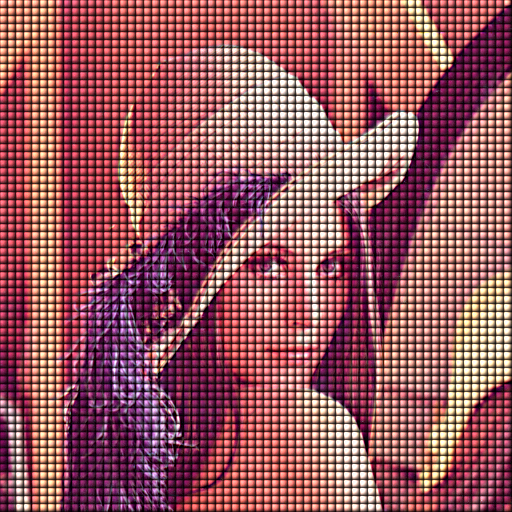

In [40]:
Image.fromarray(reconstructed_quant2.clip(0, 255).astype("uint8"))

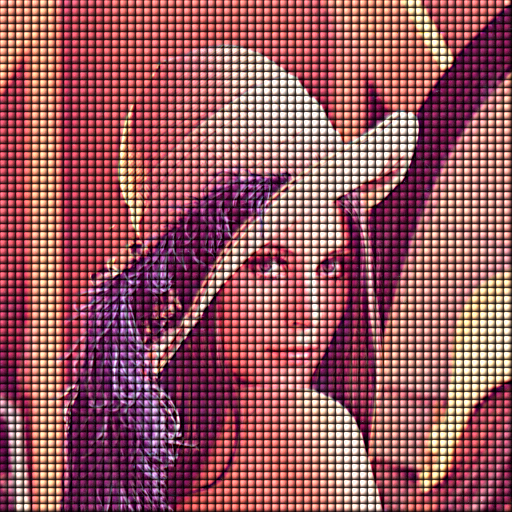

In [41]:
reversed_dct4 = calculate_dct_for_blocks(dct_quantized_4_blocks.astype(float))
reconstructed_quant4 = reconstruct_image_from_blocks(reversed_dct4, 8)
Image.fromarray(reconstructed_quant4.clip(0, 255).astype("uint8"))

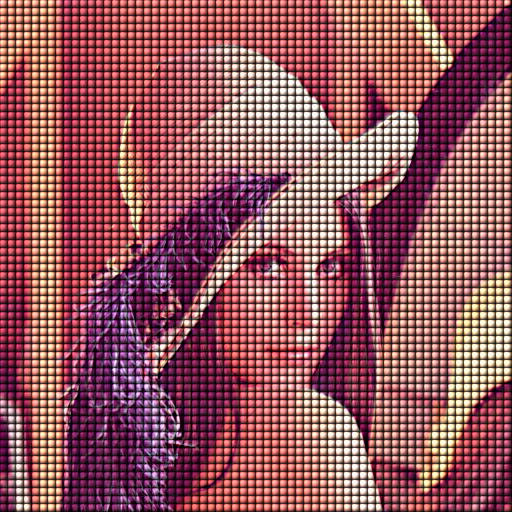

In [42]:
reconstructed_quant8 = reconstruct_image_from_blocks(reversed_dct8, 8)
Image.fromarray(reconstructed_quant8.clip(0, 255).astype("uint8"))

In [43]:
reconstructed_quant4.max(), reconstructed_quant4.mean()

(484.8018771278402, 111.67963939967628)

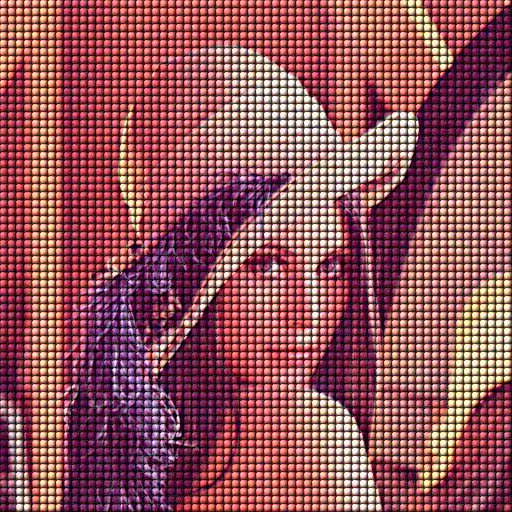

In [44]:
reconstructed_quant32 = reconstruct_image_from_blocks(reversed_dct32, 8)
Image.fromarray(reconstructed_quant32.clip(0, 255).astype("uint8"))

Don't know where does the lines come from, skip now

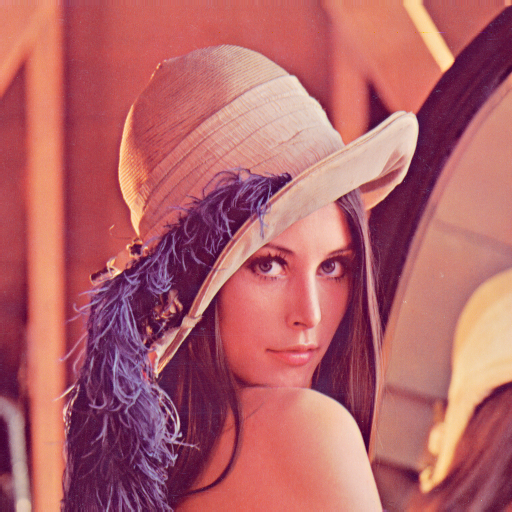

In [45]:
reconstructed_original = reconstruct_image_from_blocks(blocks, 8)
Image.fromarray(reconstructed_original.astype("uint8"))

In [46]:
# create function for whole process
def copmpess_image(img, quantization_level=2, num_blocks=8):
    img_arr = np.array(img)
    splitted_image = split_image_on_blocks(img_arr, num_blocks)
    dct_blocks = calculate_dct_for_blocks(splitted_image)
    dct_quantized_blocks = quantize(dct_blocks, quantization_level)
    reversed_dct = calculate_dct_for_blocks(dct_quantized_blocks.astype(float), inversed=True)
    reconstructed_quant = reconstruct_image_from_blocks(reversed_dct, 8)
    return Image.fromarray(reconstructed_quant4.clip(0, 255).astype("uint8"))

In [47]:
# reverse order of quantization and dct
def copmpess_image_v2(img, quantization_level=2, num_blocks=8):
    img_arr = np.array(img)
    splitted_image = split_image_on_blocks(img_arr, num_blocks)
    quantized_blocks = quantize(splitted_image, quantization_level)
    dct_blocks = calculate_dct_for_blocks(quantized_blocks.astype(float))
    reversed_dct = calculate_dct_for_blocks(dct_blocks.astype(float), inversed=True)
    reconstructed_quant = reconstruct_image_from_blocks(reversed_dct, 8)
    return Image.fromarray(reconstructed_quant4.clip(0, 255).astype("uint8"))

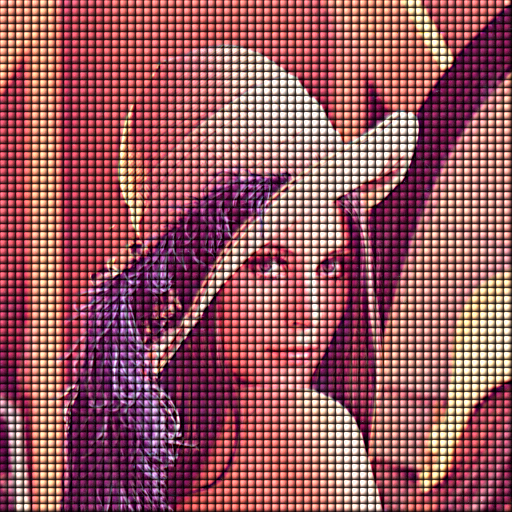

In [48]:
copmpess_image_v2(img)
# doesn't change anything :/

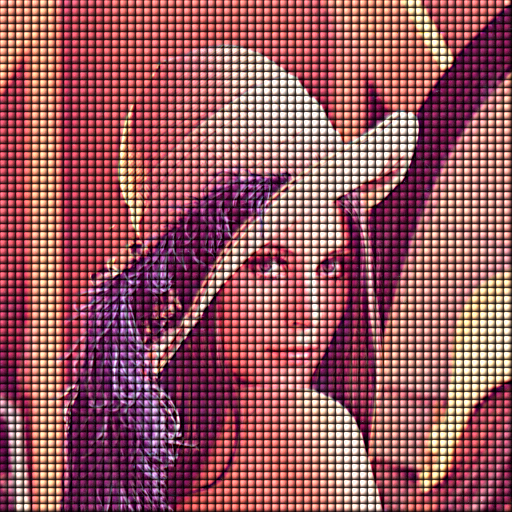

In [49]:
copmpess_image(img)

In [50]:
def calculate_fft_for_blocks(blocks):
    fft_blocks = np.zeros(blocks.shape)
    for i in range(0, blocks.shape[0]):
        for j in range(0, blocks.shape[1]):
            for c in range(0, blocks.shape[2]):
                fft_blocks[i, j, c, :] = np.fft.fft2(blocks[i, j, c, :])
    return fft_blocks

def calculate_ifft_for_blocks(blocks):
    fft_blocks = np.zeros(blocks.shape)
    for i in range(0, blocks.shape[0]):
        for j in range(0, blocks.shape[1]):
            for c in range(0, blocks.shape[2]):
                fft_blocks[i, j, c, :] = np.fft.ifft2(blocks[i, j, c, :])
    return fft_blocks

In [51]:
# use fft instead of dct
def copmpess_image_fft(img, quantization_level=2, num_blocks=8):
    img_arr = np.array(img)
    splitted_image = split_image_on_blocks(img_arr, num_blocks)
    fft_blocks = calculate_fft_for_blocks(splitted_image)
    fft_quantized_blocks = quantize(fft_blocks, quantization_level)
    reversed_fft = calculate_ifft_for_blocks(fft_quantized_blocks.astype(float))
    reconstructed_quant = reconstruct_image_from_blocks(reversed_fft, 8)
    return Image.fromarray(reconstructed_quant4.clip(0, 255).astype("uint8"))

<ipython-input-50-10902e782f42>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_blocks[i, j, c, :] = np.fft.fft2(blocks[i, j, c, :])
<ipython-input-50-10902e782f42>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  fft_blocks[i, j, c, :] = np.fft.ifft2(blocks[i, j, c, :])


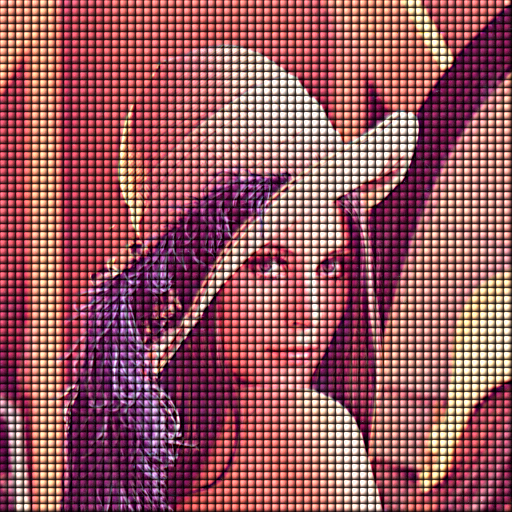

In [52]:
copmpess_image_fft(img)

In [53]:
# quantization without transformation
def quiantize_image(img, quantization_level=2):
    img_arr = np.array(img)
    quantized = quantize(img_arr, quantization_level)
    return Image.fromarray(quantized.clip(0, 255).astype("uint8"))

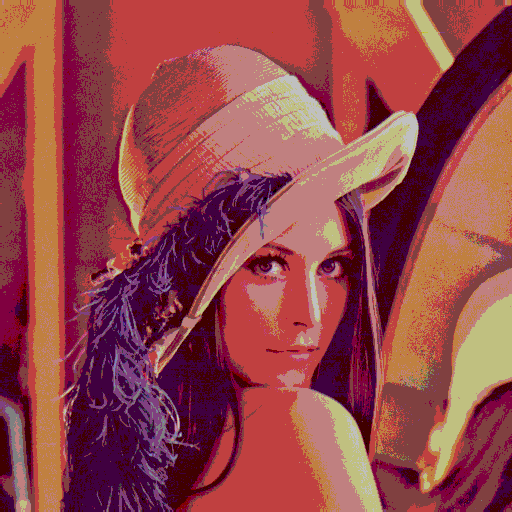

In [54]:
quiantize_image(img, 64)

In [55]:
# use YCbCr color space
img_ycbcr = img.convert("YCbCr")

In [56]:
ycbcr_arr = np.array(img_ycbcr)

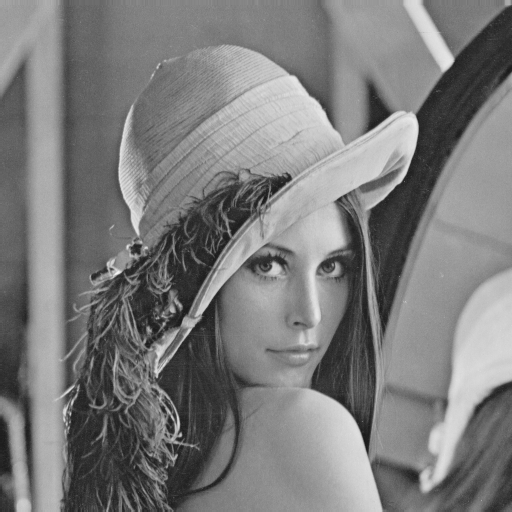

In [57]:
Image.fromarray(ycbcr_arr[:, :, 0])

In [58]:
def copmpess_image_ycbcr(img, quantization_level=2, num_blocks=8):
    img_arr = np.array(img.convert("YCbCr"))
    splitted_image = split_image_on_blocks(img_arr, num_blocks)
    dct_blocks = calculate_dct_for_blocks(splitted_image)
    dct_quantized_blocks = quantize(dct_blocks, quantization_level)
    reversed_dct = calculate_dct_for_blocks(dct_quantized_blocks.astype(float), inversed=True)
    reconstructed_quant = reconstruct_image_from_blocks(reversed_dct, 8)
    return Image.fromarray(reconstructed_quant4.clip(0, 255).astype("uint8"))

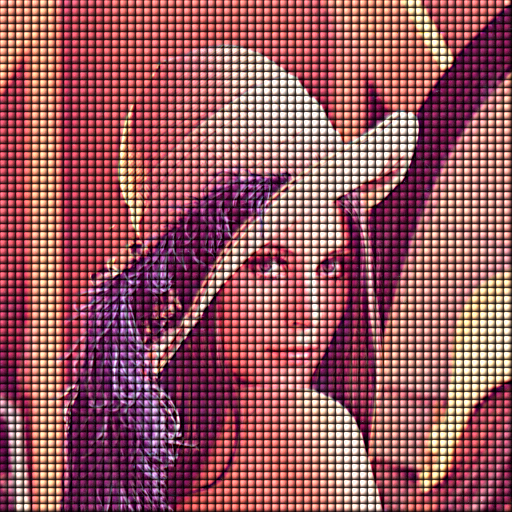

In [59]:
copmpess_image_ycbcr(img, 32)

In [60]:
import seaborn as sns

In [61]:
# histograms of errors
def show_error_hist(original, compressed):
    sns.histplot((np.array(original) - compressed.clip(0, 255)).flatten())

In [62]:
def show_imgs_diff(img: Image.Image, compressed_array: np.ndarray):
    return Image.fromarray((np.array(img) - compressed_array).clip(0, 255).astype("uint8"))

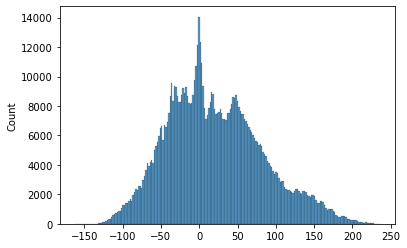

In [63]:
show_error_hist(img, reconstructed_quant1)

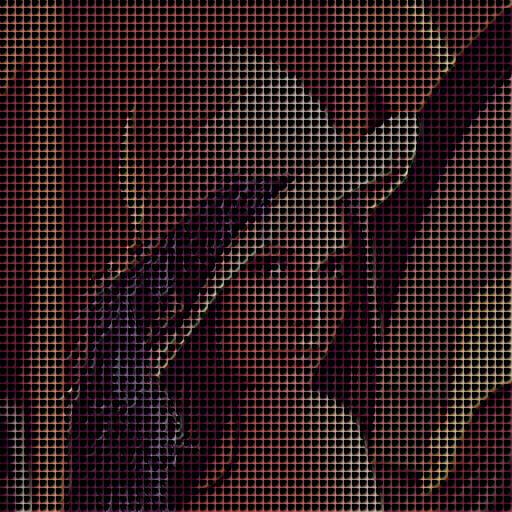

In [64]:
show_imgs_diff(img, reconstructed_quant1)

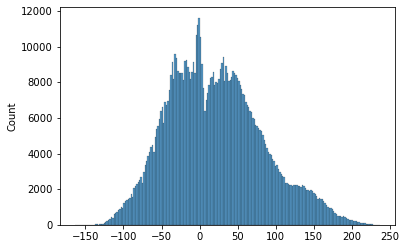

In [65]:
show_error_hist(img, reconstructed_quant8)

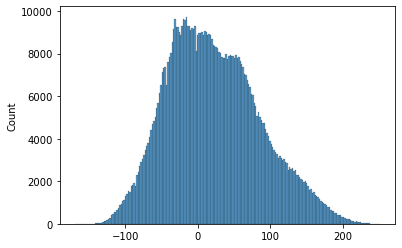

In [66]:
show_error_hist(img, reconstructed_quant32)

# Compute the histogram of a given image and of its prediction errors

In [75]:
def predict_on_prev_pix(image):
    errors = np.zeros(image.shape)
    # height
    for i in range(0, image.shape[0]):
        # width
        for j in range(0, image.shape[1]):
            for c in range(0, image.shape[2]): 
                if j > 0: 
                    errors[i, j, c] = image[i, j-1, c] - image[i, j, c]
                elif i > 0:
                    errors[i, j, c] = image[i-1, j, c] - image[i, j, c]
                else:
                    errors[i, j, c] = 0
    return errors

<ipython-input-75-3fa2cd8548fc>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  errors[i, j, c] = image[i, j-1, c] - image[i, j, c]
<ipython-input-75-3fa2cd8548fc>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  errors[i, j, c] = image[i-1, j, c] - image[i, j, c]


<AxesSubplot:ylabel='Count'>

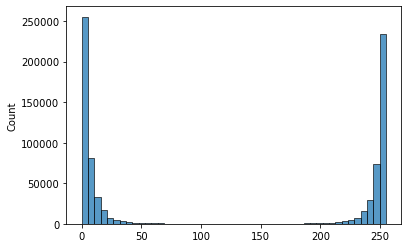

In [78]:
sns.histplot(predict_on_prev_pix(img_arr).flatten())

In [96]:
def predict_on_next_pix(image):
    errors = np.zeros(image.shape)
    # height
    for i in range(image.shape[0]-1, -1, -1):
        # width
        for j in range(image.shape[1]-1, -1, -1):
            for c in range(0, image.shape[2]): 
                if j < image.shape[1]: 
                    errors[i, j, c] = image[i, j-1, c] - image[i, j, c]
                elif i < image.shape[0]:
                    errors[i, j, c] = image[i-1, j, c] - image[i, j, c]
                else:
                    errors[i, j, c] = 0
    return errors

<ipython-input-96-1fbd47c30130>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  errors[i, j, c] = image[i, j-1, c] - image[i, j, c]


<AxesSubplot:ylabel='Count'>

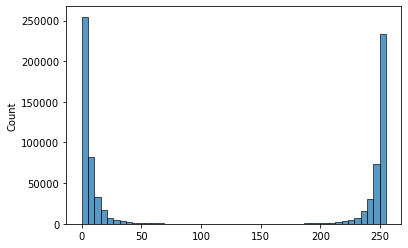

In [97]:
sns.histplot(predict_on_next_pix(img_arr).flatten())

In [98]:
def predict_on_3prev_pix(image):
    errors = np.zeros(image.shape)
    # height
    for i in range(0, image.shape[0]):
        # width
        for j in range(0, image.shape[1]):
            for c in range(0, image.shape[2]): 
                if j > 0 and i > 0: 
                    errors[i, j, c] = (image[i, j-1, c] + image[i-1, j, c] + image[i-1, j-1, c])/3 - image[i, j, c]
                else:
                    errors[i, j, c] = 0
    return errors

<ipython-input-98-16f2cc61e5c1>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  errors[i, j, c] = (image[i, j-1, c] + image[i-1, j, c] + image[i-1, j-1, c])/3 - image[i, j, c]


<AxesSubplot:ylabel='Count'>

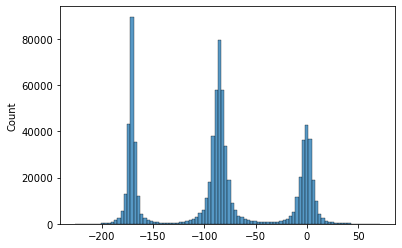

In [99]:
sns.histplot(predict_on_3prev_pix(img_arr).flatten())

calculate entropy

In [100]:
import skimage.measure    

In [101]:
skimage.measure.shannon_entropy(predict_on_prev_pix(img_arr))

<ipython-input-75-3fa2cd8548fc>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  errors[i, j, c] = image[i, j-1, c] - image[i, j, c]
<ipython-input-75-3fa2cd8548fc>:11: RuntimeWarning: overflow encountered in ubyte_scalars
  errors[i, j, c] = image[i-1, j, c] - image[i, j, c]


5.2376033089240215

In [102]:
skimage.measure.shannon_entropy(predict_on_next_pix(img_arr))

<ipython-input-96-1fbd47c30130>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  errors[i, j, c] = image[i, j-1, c] - image[i, j, c]


5.251652940225021

In [103]:
skimage.measure.shannon_entropy(predict_on_3prev_pix(img_arr))

<ipython-input-98-16f2cc61e5c1>:9: RuntimeWarning: overflow encountered in ubyte_scalars
  errors[i, j, c] = (image[i, j-1, c] + image[i-1, j, c] + image[i-1, j-1, c])/3 - image[i, j, c]


8.60527911034305